# Principe

Le tri de Shell est une version modifiée du tri par insertion qui cherche à utiliser au mieux son efficacité pour trier

* de petit tableaux
* des tableaux presque triés 

L'opération de base s'appelle le $h$-tri. Il consiste à trier le tableau par insertion, mais en sautant de $h$ indices plutôt que de $1$ lors de la recherche de la position d'insertion. C'est équivalent à découper le tableau en $h$ sous tableaux groupés par même valeur des indices modulo $h$, et à trier chacun de ces sous tableaux par insertion. 

On répète le $h$-tri pour des valeurs de h décroissantes, ce qui correspond à des sous-tableaux de plus en plus grands, mais de mieux en mieux presque triés. On finit par un $1$-tri qui est un tri par insertion classique. 

Nous allons l'illustrer en triant le tableau TAB ci-dessous.

In [1]:
TAB = [ 5, 3, 12, 8, 13, 4, 10, 11, 2, 7, 6, 9, 1 ]
print(TAB)

[5, 3, 12, 8, 13, 4, 10, 11, 2, 7, 6, 9, 1]


Effectuer un $4$-tri sur ce tableau est équivalent à trier par insertion chacun des 4 sous tableaux reprenant les éléments d'indices 0, 1, 2, et 3 modulo 4, soit 

In [2]:
def afficher_parties(T,h):
    N = len(T)
    for i in range(h):
        print("{0}%{1} :".format(i,h),T[slice(i,N,h)])
        
afficher_parties(TAB,4)

0%4 : [5, 13, 2, 1]
1%4 : [3, 4, 7]
2%4 : [12, 10, 6]
3%4 : [8, 11, 9]


# Le $h$-tri

L'algorithme de $h$-tri est quasi identique à celui du tri par insertion. Mais plutôt que de reculer d'une position pour tenter l'insertion, on recule de $h$. Cela change 3 lignes de code (la version commentée est celle correspondante du tri par insertion) 

In [3]:
def h_tri(T,h):
    N = len(T)
    for j in range(1,N):
        tmp = T[j]
        
        i = j
        
#       while i > 0 and tmp < T[i-1]:   
        while i > h-1 and tmp < T[i-h]:   
            
#           T[i] = T[i-1]
            T[i] = T[i-h]
    
#           i -= 1
            i -= h
            
        T[i] = tmp

Voyons son effet sur le tableau

In [4]:
T = TAB.copy()
print(T)
h_tri(T,4)
print(T)

[5, 3, 12, 8, 13, 4, 10, 11, 2, 7, 6, 9, 1]
[1, 3, 6, 8, 2, 4, 10, 9, 5, 7, 12, 11, 13]


Le but de cette opération était qu'il soit mieux *presque* trié. Son effet est sans doute plus explicite si l'on affiche les 4 parties qui correspondent aux indices égaux modulo 4. 

In [5]:
afficher_parties(T,4)

0%4 : [1, 2, 5, 13]
1%4 : [3, 4, 7]
2%4 : [6, 10, 12]
3%4 : [8, 9, 11]


# Boucle externe

La boucle externe consiste à appeler le $h$-tri pour des valeurs de $h$ décroissantes. On ne connait malheureusement pas la meilleure suite de valeurs de $h$ à utiliser. En pratique, la suite récursive $h(0) = 1$, $h(k) = 3 \times h(k-1)+1$ donne de bons résultats. 

Elle est également simple à mettre en oeuvre. On commence avec le plus grand $h$ de la suite plus petit que $N$, puis on passe de $h(k)$ à $h(k-1)$ par simple division entière par 3. 

In [6]:
def tri_de_shell(T):
    N = len(T)
    h = 1
    while h*3 < N:
        h = 3*h+1
        
    while h >= 1:
        h_tri(T,h)
        h = h//3     # division entière

Testons le résultat

In [7]:
T = TAB.copy()
tri_de_shell(T)
print(T)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


Cela fonctionne, mais ... quelque soit le prétraitement effectué, on finit par un appel à `h_tri(T,1)`, qui est un tri par insertion classique. On était donc certain de bien trier le tableau. Une question plus intéressante est de voir l'effet du prétraitement sur la complexité. 

# Complexité

Pour évaluer la complexité de cet algorithme, réécrivons le pour qu'il compte le nombre de comparaisons et d'écritures dans le tableau (il n'y a pas d'échanges dans ce tri). 

In [8]:
def tri_de_shell_cnt(T):
    nb_comparaisons = nb_ecritures = 0

    N = len(T)
    h = 1
    while h*3 < N:
        h = 3*h+1
        
    while h >= 1:
        
        for j in range(1,N):
            tmp = T[j]
            i = j
            nb_comparaisons += 1 
            while i > h-1 and tmp < T[i-h]:
                nb_comparaisons += 1
                T[i] = T[i-h]
                nb_ecritures += 1
                i -= h
            T[i] = tmp
            nb_ecritures += 1
        
        h = h//3   
      
    return nb_comparaisons, nb_ecritures

Evaluons d'abord la complexité du tri d'un tableau au contenu généré aléatoirement.

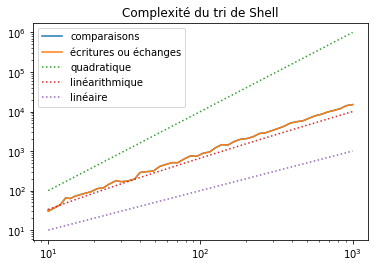

    N |     Comp. |      Ech.
-------------------------------
   10 |        33 |        33
   19 |        93 |        93
   37 |       196 |       196
   71 |       508 |       508
  138 |      1449 |      1449
  268 |      2890 |      2890
  517 |      6757 |      6757
 1000 |     14945 |     14945


In [10]:
import include.helpers as hlp    
hlp.evalue_complexite(tri_de_shell_cnt, 
                      hlp.tableau_aleatoire, 
                      "tri de Shell")

Notons que 

* le nombre de comparaisons et d'écritures est égal 
* leur complexité est proche mais légèrement plus grande que $\Theta(n.log(n))$ pour trier $n$ éléments. 
* mais le nombre exact de comparaisons varie, sans doute en fonction du contenu du tableau

Vérifions cette dernière hypothèse en triant un tableau déjà trié

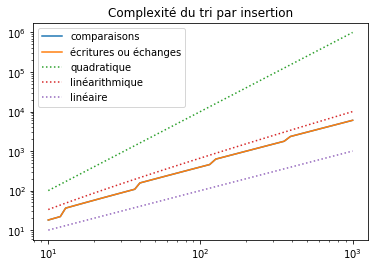

    N |     Comp. |      Ech.
-------------------------------
   10 |        18 |        18
   19 |        54 |        54
   37 |       108 |       108
   71 |       280 |       280
  138 |       685 |       685
  268 |      1335 |      1335
  517 |      3096 |      3096
 1000 |      5994 |      5994


In [11]:
hlp.evalue_complexite(tri_de_shell_cnt, 
                      hlp.tableau_trie, 
                      "tri par insertion")

Cette fois la complexité semble être réellement linéarithimique. C'est normal, puisque chacun des $h$-tris effectue un $h$ tris par insertion sur des tableaux de $\frac{n}{h}$ éléments triés, ce qui est de complexité $h \Theta(\frac{n}{h}) = \Theta(n)$. Par ailleurs, la suite des $h$ choisie implique que $log_3(n)$ $h$-tris sont effectués. On a donc une complexité totale de l'ordre de $\Theta(n.log_3(n))$ . 

Observons maintenant le cas inverse d'une entrée triée à l'envers

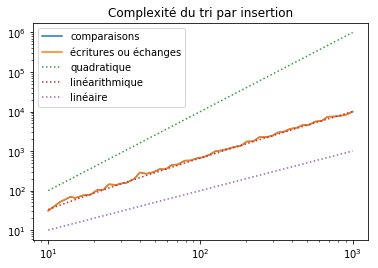

    N |     Comp. |      Ech.
-------------------------------
   10 |        31 |        31
   19 |        79 |        79
   37 |       202 |       202
   71 |       457 |       457
  138 |      1040 |      1040
  268 |      2257 |      2257
  517 |      4608 |      4608
 1000 |      9914 |      9914


In [12]:
hlp.evalue_complexite(tri_de_shell_cnt, 
                      hlp.tableau_trie_inverse, 
                      "tri par insertion")

Nous avons de nouveau une complexité linéarithmique. Notons que ce n'est pas le pire cas. Les $h$ parties sont ici bien équilibrées, ce qui est favorable. 

Déterminer le pire des cas est sensiblement plus complexe (et hors sujet pour ce cours), mais il est possible de prouver que la complexité est alors de l'ordre de $\Theta(n^{1.5})$ pour la suite $h(k) = 3 \times h(k-1)+1$. 

On ne connait pas la suite $h(k)$ optimale, ni la complexité que celle-ci permettrait d'atteindre. En pratique, le tri de Shell est cependant assez proche de l'efficacité des meilleurs tris (rapide et fusion) tout en étant relativement plus simple à mettre en oeuvre. 

# Stabilité

Le tri de Shell n'est pas stable. En effet le $h$-tri avec $h>1$ fait bouger les éléments sans tenir compte des $h-1$ éléments entre deux éléments d'indice égaux modulo $h$. Il est donc possible qu'il modifie l'ordre d'éléments égaux.  

Pour l'illuster, réécrivons le tri avec une fonction de comparaison générique. 


Le tri n'est pas stable


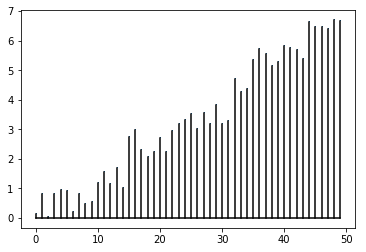

In [13]:
def tri_de_shell_generique(T,plus_petit):
    N = len(T)
    h = 1
    while h*3 < N:
        h = 3*h+1       
    while h >= 1:      
        for j in range(1,N):
            tmp = T[j]
            i = j
            while i > h-1 and plus_petit(tmp,T[i-h]):
                T[i] = T[i-h]
                i -= h
            T[i] = tmp
        h = h//3   
        
hlp.test_stabilite(tri_de_shell_generique)

# Visualisation

Finalement, visualisons graphiquement le tri de Shell. Trions un tableau de 50 entiers aléatoires entre 0 et 100 et regardons son état après chaque h_tri. 

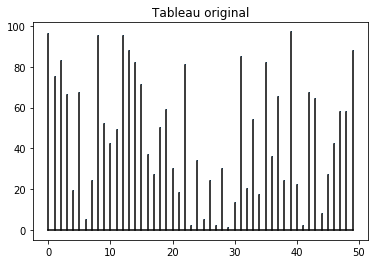

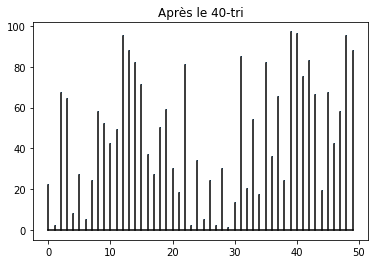

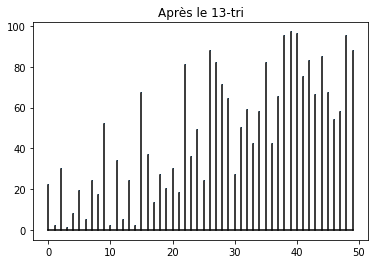

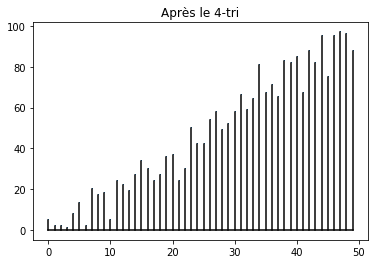

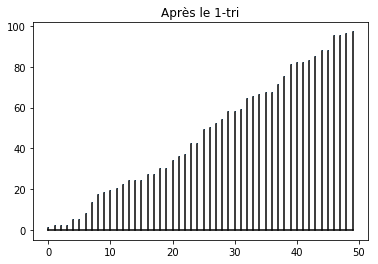

In [14]:
hlp.visualisation_tri_de_shell()